In [161]:
import scipy.io
import numpy as np
import pandas as pd
from pandas.io.parsers import read_csv
import dateutil
from dateutil.parser import parse
import pylab
from matplotlib import pyplot as plt
from IPython import get_ipython
import datetime
import matplotlib.dates
import math
from tqdm import tqdm_notebook
from scipy.signal import savgol_filter

%matplotlib inline
plt.style.use('dark_background')

In [162]:
master_df = pd.read_csv('../processed_data/master_dataset.csv')

In [163]:
master_df

,Unnamed: 0,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,...,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,0,Aruba,ABW,2020-02-15,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-15,2.0,3.0,12.0,26.0,-2.0,-2.000000
1,1,Aruba,ABW,2020-02-16,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-16,-1.0,-9.0,4.0,1.0,-1.0,2.000000
2,2,Aruba,ABW,2020-02-17,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-17,-1.0,-1.0,16.0,-4.0,-20.0,6.000000
3,3,Aruba,ABW,2020-02-18,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-18,-2.0,-5.0,8.0,2.0,-13.0,4.000000
4,4,Aruba,ABW,2020-02-19,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-19,1.0,-8.0,3.0,4.0,-14.0,4.000000
5,5,Aruba,ABW,2020-02-20,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-20,4.0,-1.0,0.0,29.0,-13.0,1.000000
6,6,Aruba,ABW,2020-02-21,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-21,7.0,9.0,9.0,1.0,-15.0,1.000000
7,7,Aruba,ABW,2020-02-22,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-22,-2.0,10.0,-4.0,13.0,-6.0,-2.000000
8,8,Aruba,ABW,2020-02-23,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-23,14.0,-15.0,21.0,16.0,-8.0,-5.000000
9,9,Aruba,ABW,2020-02-24,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-24,-23.0,-30.0,24.0,-18.0,-62.0,18.000000


In [164]:
master_df.CountryName.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'United Arab Emirates',
       'Argentina', 'Australia', 'Austria', 'Belgium', 'Benin',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bolivia', 'Brazil',
       'Barbados', 'Botswana', 'Canada', 'Switzerland', 'Chile',
       'Cameroon', 'Colombia', 'Cape Verde', 'Costa Rica', 'Germany',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'Spain',
       'Estonia', 'Finland', 'France', 'Gabon', 'United Kingdom',
       'Georgia', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Honduras',
       'Croatia', 'Hungary', 'Indonesia', 'India', 'Ireland', 'Iraq',
       'Israel', 'Italy', 'Jamaica', 'Jordan', 'Japan', 'Kazakhstan',
       'Kenya', 'South Korea', 'Kuwait', 'Laos', 'Lebanon', 'Libya',
       'Sri Lanka', 'Lithuania', 'Luxembourg', 'Moldova', 'Mexico',
       'Mali', 'Mongolia', 'Mozambique', 'Mauritius', 'Malaysia',
       'Namibia', 'Niger', 'Nigeria', 'Nicaragua

In [165]:
master_df.CountryCode.unique()

array(['ABW', 'AFG', 'AGO', 'ARE', 'ARG', 'AUS', 'AUT', 'BEL', 'BEN',
       'BFA', 'BGD', 'BGR', 'BHR', 'BIH', 'BLR', 'BLZ', 'BOL', 'BRA',
       'BRB', 'BWA', 'CAN', 'CHE', 'CHL', 'CMR', 'COL', 'CPV', 'CRI',
       'DEU', 'DNK', 'DOM', 'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FRA',
       'GAB', 'GBR', 'GEO', 'GHA', 'GRC', 'GTM', 'HKG', 'HND', 'HRV',
       'HUN', 'IDN', 'IND', 'IRL', 'IRQ', 'ISR', 'ITA', 'JAM', 'JOR',
       'JPN', 'KAZ', 'KEN', 'KOR', 'KWT', 'LAO', 'LBN', 'LBY', 'LKA',
       'LTU', 'LUX', 'MDA', 'MEX', 'MLI', 'MNG', 'MOZ', 'MUS', 'MYS',
       'NAM', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL', 'OMN',
       'PAK', 'PAN', 'PER', 'PHL', 'PNG', 'POL', 'PRI', 'PRT', 'PRY',
       'QAT', 'ROU', 'RWA', 'SAU', 'SEN', 'SGP', 'SLV', 'SRB', 'SVN',
       'SWE', 'THA', 'TTO', 'TUR', 'TZA', 'UGA', 'URY', 'USA', 'VEN',
       'VNM', 'YEM', 'ZAF', 'ZMB', 'ZWE', 'TWN'], dtype=object)

In [166]:
master_df.columns

Index(['Unnamed: 0', 'CountryName', 'CountryCode', 'Date', 'C1_School closing',
       'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events',
       'C3_Flag', 'C4_Restrictions on gatherings', 'C4_Flag',
       'C5_Close public transport', 'C5_Flag', 'C6_Stay at home requirements',
       'C6_Flag', 'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'M1_Wildcard', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDisplay', 'GovernmentResponseIndex',
       'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndex',
       'Conta

In [167]:
def make_df():
    new_df = pd.DataFrame()
    new_df['CountryName'] = master_df.CountryName.unique()
    new_df['CountryCode'] = master_df.CountryCode.unique()
    
    #work places
    dates = []
    u30work_vals = []
    gov_index_work = []
    cont_index_work = []
    econ_index_work = []
    strin_index_work = []
    cases = []
    for country in new_df['CountryCode']:
        country_df = master_df[master_df.CountryCode == country]
        idx = (country_df['workplaces_percent_change_from_baseline'] >= -30).idxmin()
        date = country_df['Date'].loc[idx]
        dates.append(date)
        u30work_val = country_df['workplaces_percent_change_from_baseline'].loc[idx]
        u30work_vals.append(u30work_val)
        
        gov_index = country_df['GovernmentResponseIndex'].loc[idx]
        gov_index_work.append(gov_index)
        cont_index = country_df['ContainmentHealthIndex'].loc[idx]
        cont_index_work.append(cont_index)
        econ_index = country_df['EconomicSupportIndex'].loc[idx]
        econ_index_work.append(econ_index)
        strin_index = country_df['StringencyIndex'].loc[idx]
        strin_index_work.append(strin_index)
        cases_index = country_df['ConfirmedCases'].loc[idx]
        cases.append(cases_index)
    new_df['date_work_under_30'] = dates
    new_df['val_work_under_30'] = u30work_vals
    new_df['gov_index_work'] = gov_index_work
    new_df['cont_index_work'] = cont_index_work
    new_df['econ_index_work'] = econ_index_work
    new_df['strin_index_work'] = strin_index_work
    new_df['cases_work'] = cases
    
    #transit
    dates_tran= []
    u30tran_vals = []
    gov_index_tran = []
    cont_index_tran = []
    econ_index_tran = []
    strin_index_tran = []
    cases_tran = []
    for country in new_df['CountryCode']:
        country_df = master_df[master_df.CountryCode == country]
        idx = (country_df['transit_stations_percent_change_from_baseline'] >= -30).idxmin()
        date = country_df['Date'].loc[idx]
        dates_tran.append(date)
        u30tran_val = country_df['transit_stations_percent_change_from_baseline'].loc[idx]
        u30tran_vals.append(u30tran_val)
        
        gov_index = country_df['GovernmentResponseIndex'].loc[idx]
        gov_index_tran.append(gov_index)
        cont_index = country_df['ContainmentHealthIndex'].loc[idx]
        cont_index_tran.append(cont_index)
        econ_index = country_df['EconomicSupportIndex'].loc[idx]
        econ_index_tran.append(econ_index)
        strin_index = country_df['StringencyIndex'].loc[idx]
        strin_index_tran.append(strin_index)
        cases_index = country_df['ConfirmedCases'].loc[idx]
        cases_tran.append(cases_index)
    new_df['date_tran_under_30'] = dates_tran
    new_df['val_tran_under_30'] = u30tran_vals
    new_df['gov_index_tran'] = gov_index_tran
    new_df['cont_index_tran'] = cont_index_tran
    new_df['econ_index_tran'] = econ_index_tran
    new_df['strin_index_tran'] = strin_index_tran
    new_df['cases_tran'] = cases_tran
    return new_df

In [168]:
new_df = make_df()
new_df

,CountryName,CountryCode,date_work_under_30,val_work_under_30,gov_index_work,cont_index_work,econ_index_work,strin_index_work,cases_work,date_tran_under_30,val_tran_under_30,gov_index_tran,cont_index_tran,econ_index_tran,strin_index_tran,cases_tran
0,Aruba,ABW,2020-02-24,-62.0,0.00,0.00,0.0,0.00,0.0,2020-03-18,-49.0,23.72,28.03,0.0,30.56,3.428571
1,Afghanistan,AFG,2020-03-21,-36.0,31.41,37.12,0.0,36.11,24.0,2020-03-28,-32.0,49.36,58.33,0.0,62.04,91.000000
2,Angola,AGO,2020-02-24,-63.0,3.85,4.55,0.0,5.56,0.0,2020-03-22,-41.0,10.26,12.12,0.0,11.11,2.000000
3,United Arab Emirates,ARE,2020-03-25,-35.0,66.67,69.70,50.0,70.37,248.0,2020-03-19,-31.0,41.67,49.24,0.0,45.37,113.000000
4,Argentina,ARG,2020-02-24,-54.0,7.69,9.09,0.0,11.11,0.0,2020-03-17,-32.0,35.26,41.67,0.0,41.67,65.000000
5,Australia,AUS,2020-03-29,-33.0,67.31,65.91,75.0,71.30,3809.0,2020-03-22,-34.0,44.87,48.48,NaN,44.44,1098.000000
6,Austria,AUT,2020-03-16,-43.0,70.51,74.24,50.0,81.48,860.0,2020-03-14,-34.0,42.31,50.00,0.0,51.85,504.000000
7,Belgium,BEL,2020-03-16,-36.0,55.13,49.24,87.5,50.93,886.0,2020-03-14,-34.0,55.13,49.24,87.5,50.93,559.000000
8,Benin,BEN,2020-04-13,-50.0,51.60,60.98,0.0,59.72,35.0,2020-04-13,-35.0,51.60,60.98,0.0,59.72,35.000000
9,Burkina Faso,BFA,2020-03-09,-41.0,10.26,12.12,0.0,0.00,0.0,2020-03-22,-34.0,60.90,71.97,0.0,73.15,64.000000


In [169]:
taiwan = master_df[master_df.CountryCode == 'ABW']
taiwan

,Unnamed: 0,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,...,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,0,Aruba,ABW,2020-02-15,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-15,2.0,3.0,12.0,26.0,-2.0,-2.000000
1,1,Aruba,ABW,2020-02-16,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-16,-1.0,-9.0,4.0,1.0,-1.0,2.000000
2,2,Aruba,ABW,2020-02-17,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-17,-1.0,-1.0,16.0,-4.0,-20.0,6.000000
3,3,Aruba,ABW,2020-02-18,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-18,-2.0,-5.0,8.0,2.0,-13.0,4.000000
4,4,Aruba,ABW,2020-02-19,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-19,1.0,-8.0,3.0,4.0,-14.0,4.000000
5,5,Aruba,ABW,2020-02-20,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-20,4.0,-1.0,0.0,29.0,-13.0,1.000000
6,6,Aruba,ABW,2020-02-21,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-21,7.0,9.0,9.0,1.0,-15.0,1.000000
7,7,Aruba,ABW,2020-02-22,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-22,-2.0,10.0,-4.0,13.0,-6.0,-2.000000
8,8,Aruba,ABW,2020-02-23,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-23,14.0,-15.0,21.0,16.0,-8.0,-5.000000
9,9,Aruba,ABW,2020-02-24,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-24,-23.0,-30.0,24.0,-18.0,-62.0,18.000000


In [170]:
taiwan['transit_stations_percent_change_from_baseline'].describe()

count    92.000000
mean    -41.739130
std      33.570614
min     -92.000000
25%     -68.000000
50%     -55.000000
75%       0.000000
max      29.000000
Name: transit_stations_percent_change_from_baseline, dtype: float64

In [171]:
idx

9784

In [173]:
def make_df():
    new_df = pd.DataFrame()
    new_df['CountryName'] = master_df.CountryName.unique()
    new_df['CountryCode'] = master_df.CountryCode.unique()
    
    #work places
    dates = []
    u30work_vals = []
    for country in new_df['CountryCode']:
        country_df = master_df[master_df.CountryCode == country]
        idx = (country_df['workplaces_percent_change_from_baseline'] >= -30).idxmin()
        date = country_df['Date'].loc[idx]
        dates.append(date)
        u30work_val = country_df['workplaces_percent_change_from_baseline'].loc[idx]
        u30work_vals.append(u30work_val)
    new_df['date_work_under_30'] = dates
    new_df['val_work_under_30'] = u30work_vals
    return new_df

In [174]:
df = make_df()
df

,CountryName,CountryCode,date_work_under_30,val_work_under_30
0,Aruba,ABW,2020-02-24,-62.0
1,Afghanistan,AFG,2020-03-21,-36.0
2,Angola,AGO,2020-02-24,-63.0
3,United Arab Emirates,ARE,2020-03-25,-35.0
4,Argentina,ARG,2020-02-24,-54.0
5,Australia,AUS,2020-03-29,-33.0
6,Austria,AUT,2020-03-16,-43.0
7,Belgium,BEL,2020-03-16,-36.0
8,Benin,BEN,2020-04-13,-50.0
9,Burkina Faso,BFA,2020-03-09,-41.0


In [175]:
usa = master_df[master_df.CountryCode == 'USA']
mob_sg = savgol_filter(usa['retail_and_recreation_percent_change_from_baseline'], 25, 3)
initial = usa['Unnamed: 0'].iloc[0]
usa['Day'] = usa['Unnamed: 0'].apply(lambda x: x - initial)
usa['smooth'] = mob_sg
usa['smooth'].min()
x = usa[usa['GovernmentResponseIndexForDisplay']!= 0]
x['GovernmentResponseIndexForDisplay'].mean()
"""
'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
"""

/Users/nikhilmehta1/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/Users/nikhilmehta1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/nikhilmehta1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

"\n'retail_and_recreation_percent_change_from_baseline',\n       'grocery_and_pharmacy_percent_change_from_baseline',\n       'parks_percent_change_from_baseline',\n       'transit_stations_percent_change_from_baseline',\n       'workplaces_percent_change_from_baseline',\n       'residential_percent_change_from_baseline'],\n"

In [188]:
def smooth_df():
    new_df = pd.DataFrame()
    new_df['CountryName'] = master_df.CountryName.unique()
    new_df['CountryCode'] = master_df.CountryCode.unique()
    for country in new_df['CountryCode']:
        country_df = master_df[master_df.CountryCode == country]
        master_df['smooth_workplaces_percent_change_from_baseline'] = 0
        minind = country_df['Unnamed: 0'].min()
        maxind = country_df['Unnamed: 0'].max()
        mob_sg = savgol_filter(country_df['workplaces_percent_change_from_baseline'], 25, 3)
        initial = country_df['Unnamed: 0'].iloc[0]
        country_df['Day'] = usa['Unnamed: 0'].apply(lambda x: x - initial)
        country_df['smooth_workplaces_percent_change_from_baseline'] = mob_sg
        country_df['Unnamed: 0'].min()
        country_df['Unnamed: 0'].max()
        #master_df['smooth_workplaces_percent_change_from_baseline'] = country_df['smooth_workplaces_percent_change_from_baseline']
        master_df['smooth_workplaces_percent_change_from_baseline'].iloc[minind:maxind] = country_df['smooth_workplaces_percent_change_from_baseline']
    return master_df

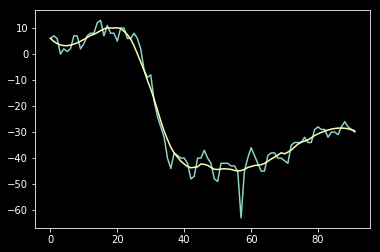

In [177]:
plt.plot(usa['Day'], usa['retail_and_recreation_percent_change_from_baseline'])
plt.plot(usa['Day'], usa['smooth'])

51.869565217391326


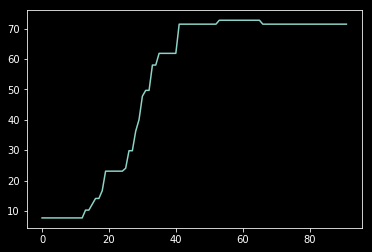

In [178]:
plt.plot(usa['Day'], usa['GovernmentResponseIndexForDisplay'])
print(usa['GovernmentResponseIndexForDisplay'].mean())

In [179]:
x = usa[usa['GovernmentResponseIndexForDisplay']!= 0]
x['GovernmentResponseIndexForDisplay'].mean()

51.869565217391326

In [180]:
print(usa['Unnamed: 0'].min())
print(usa['Unnamed: 0'].max())

9752
9843


In [183]:
master_df['smooth'] = 0
master_df['smooth'].iloc[9752:9843] = usa['smooth']

/Users/nikhilmehta1/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [189]:
hi = smooth_df()
hi

/Users/nikhilmehta1/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/Users/nikhilmehta1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/nikhilmehta1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,Unnamed: 0,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,...,EconomicSupportIndexForDisplay,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,smooth,smooth_workplaces_percent_change_from_baseline
0,0,Aruba,ABW,2020-02-15,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,2020-02-15,2.0,3.0,12.0,26.0,-2.0,-2.000000,0.0,0.000000
1,1,Aruba,ABW,2020-02-16,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,2020-02-16,-1.0,-9.0,4.0,1.0,-1.0,2.000000,0.0,0.000000
2,2,Aruba,ABW,2020-02-17,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,2020-02-17,-1.0,-1.0,16.0,-4.0,-20.0,6.000000,0.0,0.000000
3,3,Aruba,ABW,2020-02-18,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,2020-02-18,-2.0,-5.0,8.0,2.0,-13.0,4.000000,0.0,0.000000
4,4,Aruba,ABW,2020-02-19,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,2020-02-19,1.0,-8.0,3.0,4.0,-14.0,4.000000,0.0,0.000000
5,5,Aruba,ABW,2020-02-20,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,2020-02-20,4.0,-1.0,0.0,29.0,-13.0,1.000000,0.0,0.000000
6,6,Aruba,ABW,2020-02-21,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,2020-02-21,7.0,9.0,9.0,1.0,-15.0,1.000000,0.0,0.000000
7,7,Aruba,ABW,2020-02-22,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,2020-02-22,-2.0,10.0,-4.0,13.0,-6.0,-2.000000,0.0,0.000000
8,8,Aruba,ABW,2020-02-23,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,2020-02-23,14.0,-15.0,21.0,16.0,-8.0,-5.000000,0.0,0.000000
9,9,Aruba,ABW,2020-02-24,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,2020-02-24,-23.0,-30.0,24.0,-18.0,-62.0,18.000000,0.0,0.000000


In [190]:
hi.plot('Unnamed: 0', 'smooth_workplaces_percent_change_from_baseline')

KeyError: 'Unamed: 0'